In [1]:
import os
import pandas as pd
from pathlib import Path
import georasters as gr
from osgeo import gdal
import datetime
import numpy as np
from pathlib import Path
import re
import seaborn as sns
import matplotlib.pyplot as plt

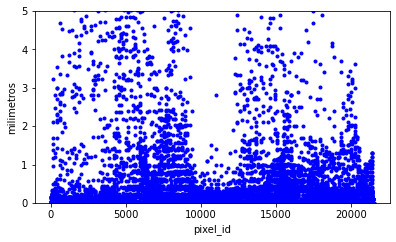

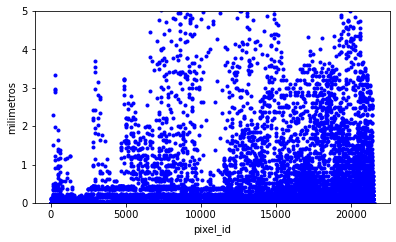

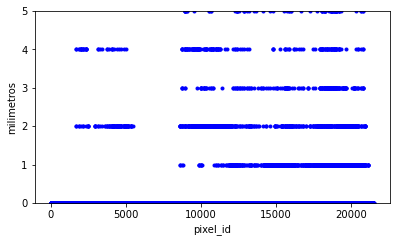

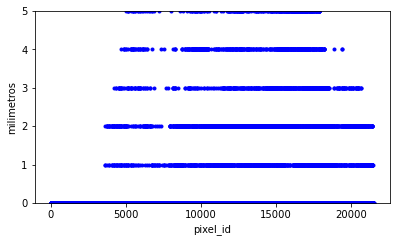

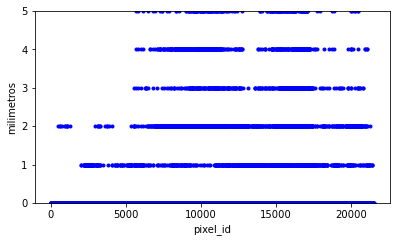

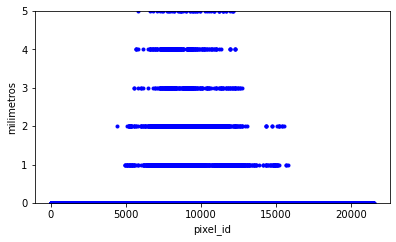

In [19]:
paths = ('/opt/datos/gfs/lluvias_00/gfs.0p25.2015072100.f015.grib2',
        '/opt/datos/gfs/lluvias_00/gfs.0p25.2016072100.f015.grib2',
        '/opt/datos/gfs/lluvias_00/gfs.0p25.2017072100.f015.grib2',
        '/opt/datos/gfs/lluvias_00/gfs.0p25.2018072100.f015.grib2',
        '/opt/datos/gfs/lluvias_00/gfs.0p25.2019072100.f015.grib2',
        '/opt/datos/gfs/lluvias_00/gfs.0p25.2020072100.f015.grib2')

for i in range(len(paths)):
    grib = gdal.Open(paths[i])
    band1 = grib.GetRasterBand(1) #prec total
    band2 = grib.GetRasterBand(2) #prec convectiva
    data1 = band1.ReadAsArray()
    data2 = band2.ReadAsArray()
    data = data1 + data2
    n = data.shape[0]*data.shape[1]
    
    plt.figure(figsize=(14,12))
    plt.subplot(3,2,i+1), plt.plot(range(n), data.flatten(), 'b.'), plt.ylim(0,5)
    plt.ylabel('milimetros'), plt.xlabel('pixel_id')